# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices. 
____

I'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016. I am going to use the data from https://www.google.com/finance

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Question 1. Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'google', start, end)
BAC.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900


In [4]:
# CitiGroup
C = data.DataReader("C", 'google', start, end)
C.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,490.0,493.8,481.1,492.9,1537660
2006-01-04,488.6,491.0,483.5,483.8,1871020
2006-01-05,484.4,487.8,484.0,486.2,1143160


In [5]:
# Goldman Sachs
GS = data.DataReader("GS", 'google', start, end)
GS.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,126.70,129.44,124.23,128.87,6188700
2006-01-04,127.35,128.91,126.38,127.09,4862000
2006-01-05,126.00,127.32,125.61,127.04,3717600


In [6]:
# JPMorgan Chase
JPM = data.DataReader("JPM", 'google', start, end)
JPM.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.83,40.36,39.30,40.19,12839400
2006-01-04,39.78,40.14,39.42,39.62,13491800
2006-01-05,39.61,39.81,39.50,39.74,8109400


In [7]:
# Morgan Stanley
MS = data.DataReader("MS", 'google', start, end)
MS.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,57.17,58.49,56.74,58.31,5377000
2006-01-04,58.70,59.28,58.35,58.35,7977800
2006-01-05,58.55,58.59,58.02,58.51,5778000


In [8]:
# Wells Fargo
WFC = data.DataReader("WFC", 'google', start, end)
WFC.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,31.6,31.98,31.20,31.90,11016400
2006-01-04,31.8,31.82,31.36,31.53,10871000
2006-01-05,31.5,31.56,31.31,31.50,10158000


In [9]:
# Could also do this for a Panel Object
# df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)

In [10]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.head(3)

BAC                                     C                       \
             Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                           
2006-01-03  46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04  47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05  46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   

                       ...        MS                                 WFC  \
             Volume    ...      Open   High    Low  Close   Volume  Open   
Date                   ...                                                 
2006-01-03  1537660    ...     57.17  58.49  56.74  58.31  5377000  31.6   
2006-01-04  1871020    ...     58.70  59.28  58.35  58.35  7977800  31.8   
2006-01-05  1143160    ...     58.55  58.59  58.02  58.51  5778000  31.5   

                                           
             High    Low  Close    Volume  
Date                                       
2006-01-03  31.98  31.20  31.90  11016400  
2006-01-04  31.82  31.36  31.53  10871000  
2006-01-05  31.56  31.31  31.50  10158000  

[3 rows x 30 columns]

** Set the column name levels:**

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, some documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).


** Question 2. What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Let's create a new empty DataFrame. This dataframe will contain the returns for each bank's stock. returns are will be defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [14]:
for i in tickers:
    returns[i + ' Return'] = bank_stocks[i, 'Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Question 3. Create a pairplot of the returns dataframe. What stock stands out to you? Can you figure out why?**

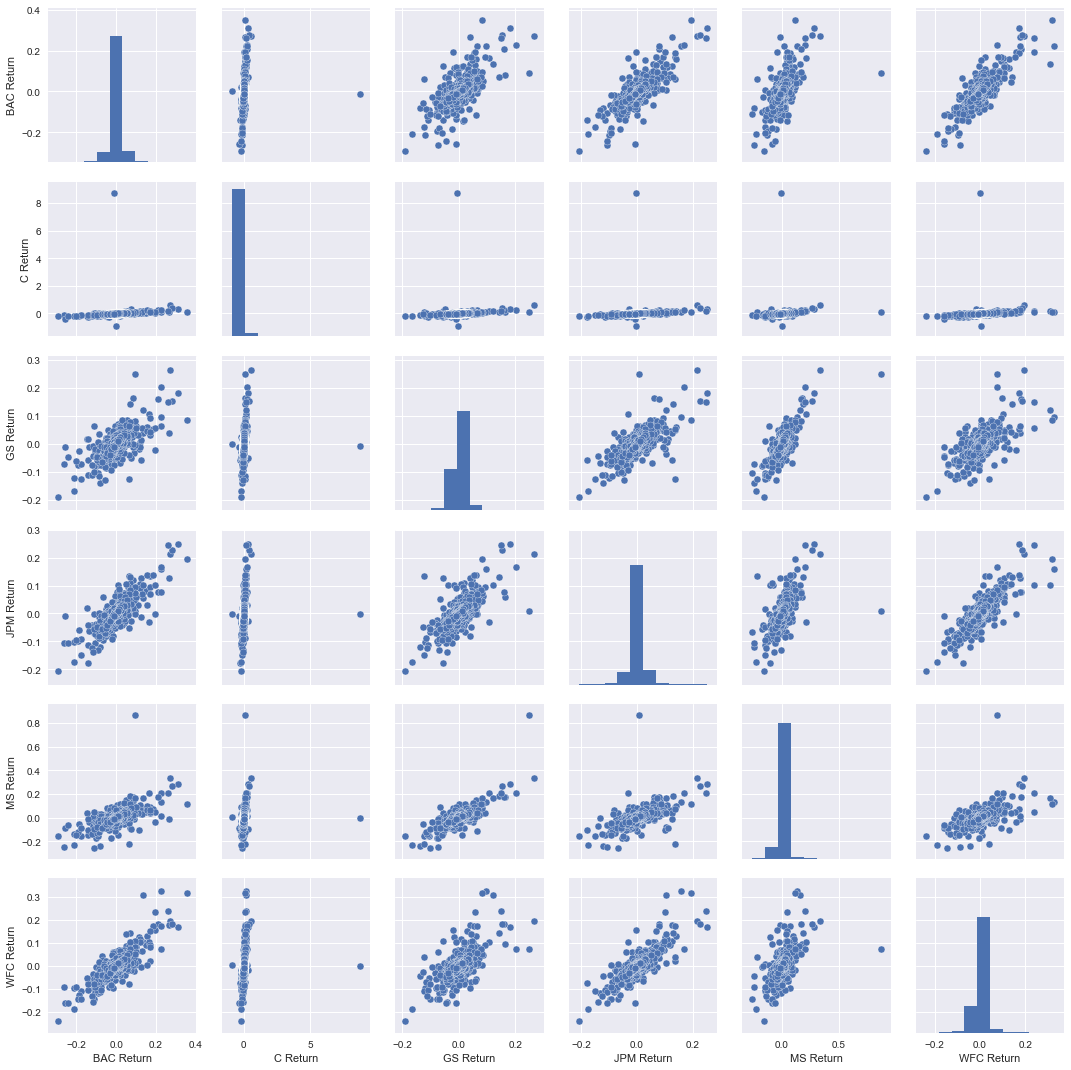

In [15]:
sns.pairplot(returns[1: ])# we do not need the "Date" column

 The graphs for Citigroup looks strange. Let's try to visualize stock prices.

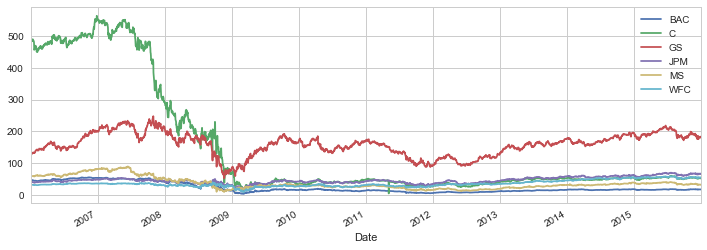

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

** Question 4. Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [18]:
# Best single day return:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [19]:
# Worst single day return:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

Bank Of America, Goldman Sachs, JPMorgan Chase, and Wells Fargo had the worst drop on Jan 20th, 2009 - the day of Barack Obama's inauguration.

** Question 5. You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

Citigroup stock split in May 2011

** Question 6. Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [21]:
returns.std() 

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

Citigroup is the riskiest since it has largest standard deviation of the returns.

In [23]:
# 2015
returns.loc['2015-01-01':'2015-12-31'].std() 

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Very similar risk profiles.

** Question 7. Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

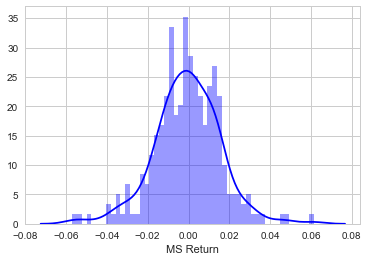

In [25]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='blue',bins=50)

** Question 8. Create a distplot using seaborn of the 2008 returns for CitiGroup **

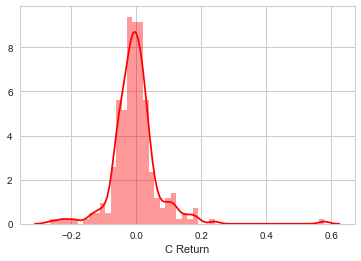

In [26]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50)

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Question9. Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

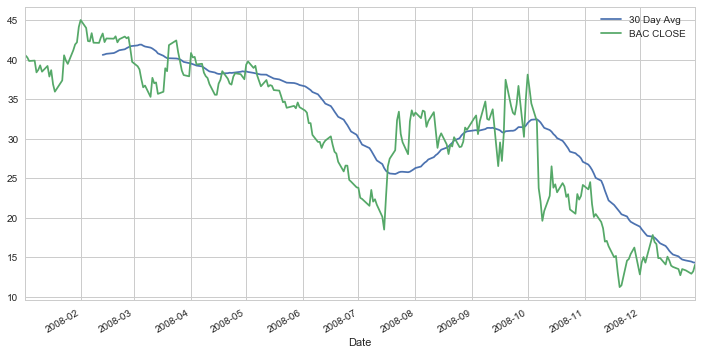

In [28]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Question 10. Create a heatmap of the correlation between the stocks Close Price.**

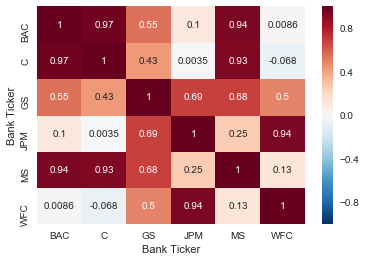

In [29]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

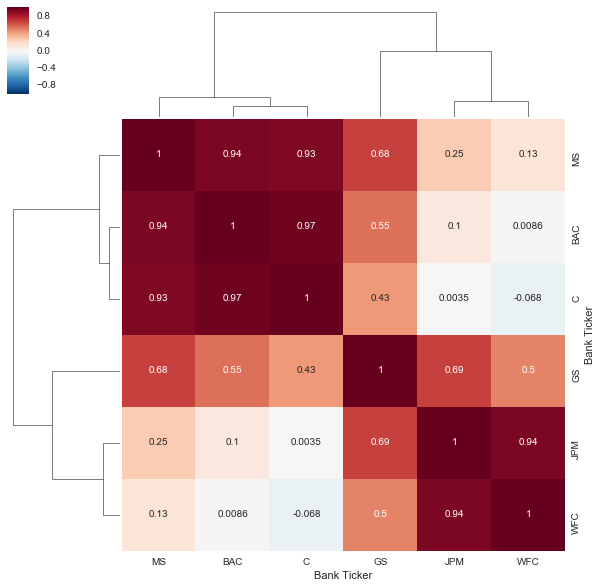

In [31]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)